In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
import numpy as np 
import glob
from scipy import stats
from scipy import misc

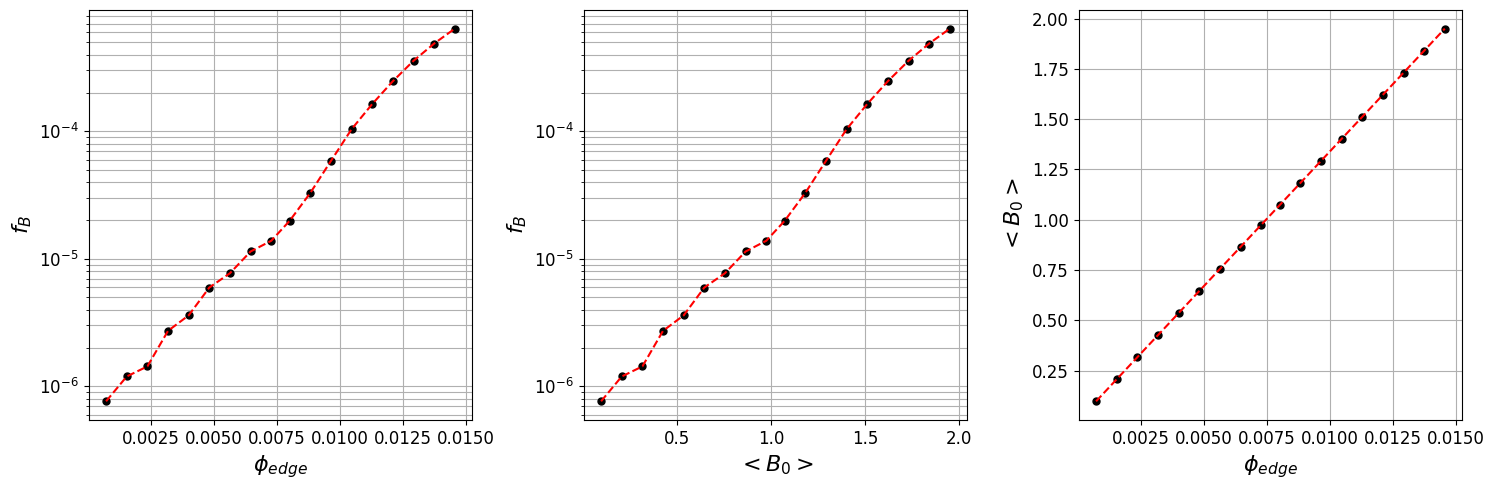

In [20]:
data=pd.read_csv("B_0_study.txt", header=None, sep=" ")
data.columns = ["PHIEDGE","B0","f_B"]
PHIEDGE = data["PHIEDGE"]
B0 = data["B0"]
f_B = data["f_B"]

f, ax = plt.subplots(1,3,figsize = (15,5))

ax[0].semilogy(PHIEDGE, f_B, "k.",markersize=10)
ax[0].semilogy(PHIEDGE, f_B, "r--")
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[0].tick_params(axis='both', which='minor', labelsize=12)
ax[0].grid(True,which = 'both')
ax[0].set_xlabel(r'$\phi_{edge}$',fontsize=16)
ax[0].set_ylabel(r'$f_B$',fontsize=16, horizontalalignment='right')

ax[1].semilogy(B0, f_B, "k.",markersize=10)
ax[1].semilogy(B0, f_B, "r--")
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='minor', labelsize=12)
ax[1].grid(True,which = 'both')
ax[1].set_xlabel(r'$<B_0>$',fontsize=16)
ax[1].set_ylabel(r'$f_B$',fontsize=16, horizontalalignment='right')

ax[2].plot(PHIEDGE, B0, "k.",markersize=10)
ax[2].plot(PHIEDGE, B0, "r--")
ax[2].tick_params(axis='both', which='major', labelsize=12)
ax[2].tick_params(axis='both', which='minor', labelsize=12)
ax[2].grid(True,which = 'both')
ax[2].set_xlabel(r'$\phi_{edge}$',fontsize=16)
ax[2].set_ylabel(r'$<B_0>$',fontsize=16)
#ax.set_xlim(0,0.40)
#ax.set_ylim(1e-6,1e-2)
plt.tight_layout()

In [34]:
path = os.getcwd()
list_folders = [f.path for f in os.scandir(path) if f.is_dir()]
list_folders = [item for item in list_folders if item.split("/")[-1] != "wout_files"]

import re

# Define a custom sorting key using a regular expression to extract PHIEDGE values
def get_phiedge(filename):
    match = re.search(r"PHIEDGE=([\d.]+)", filename)
    return float(match.group(1)) if match else 0.0

# Sort the list based on the PHIEDGE values
list_folders = sorted(list_folders, key=get_phiedge)
print(list_folders)
B0_list=[]
phi_list=[]
eff_vol_list=[]
MSE_list = []
nmagnets_list=[]

for folder in list_folders:
    B0_path =  glob.glob(os.path.join(folder, "B0_PHIEDGE=*.txt"))[0]
    phi_path =  glob.glob(os.path.join(folder, "phi_PHIEDGE=*.txt"))[0]
    eff_vol_path = glob.glob(os.path.join(folder, "eff_vol_*.txt"))[0]
    MSE_path = glob.glob(os.path.join(folder, "R2history_K*.txt"))[0]
    nmagnets_opt = int(glob.glob(os.path.join(folder,"best_result_m=*.txt"))[0].split(sep="//")[-1].split(sep="=")[-1].split(sep=".")[0])
    
    B0_list.append(np.loadtxt(B0_path))
    phi_list.append(np.loadtxt(phi_path))
    eff_vol_list.append(np.loadtxt(eff_vol_path))
    MSE_list.append(np.loadtxt(MSE_path))
    nmagnets_list.append(nmagnets_opt)
    

['/home/madeira/ISTELL_PPCF/PHIEDGE_study/Data/QA/ISTELL_output_PHIEDGE=0.0007286', '/home/madeira/ISTELL_PPCF/PHIEDGE_study/Data/QA/ISTELL_output_PHIEDGE=0.0015482750000000002', '/home/madeira/ISTELL_PPCF/PHIEDGE_study/Data/QA/ISTELL_output_PHIEDGE=0.00236795', '/home/madeira/ISTELL_PPCF/PHIEDGE_study/Data/QA/ISTELL_output_PHIEDGE=0.003187625', '/home/madeira/ISTELL_PPCF/PHIEDGE_study/Data/QA/ISTELL_output_PHIEDGE=0.0040073', '/home/madeira/ISTELL_PPCF/PHIEDGE_study/Data/QA/ISTELL_output_PHIEDGE=0.004826975', '/home/madeira/ISTELL_PPCF/PHIEDGE_study/Data/QA/ISTELL_output_PHIEDGE=0.0056466500000000005', '/home/madeira/ISTELL_PPCF/PHIEDGE_study/Data/QA/ISTELL_output_PHIEDGE=0.006466324999999999', '/home/madeira/ISTELL_PPCF/PHIEDGE_study/Data/QA/ISTELL_output_PHIEDGE=0.007286', '/home/madeira/ISTELL_PPCF/PHIEDGE_study/Data/QA/ISTELL_output_PHIEDGE=0.0080146', '/home/madeira/ISTELL_PPCF/PHIEDGE_study/Data/QA/ISTELL_output_PHIEDGE=0.008834275', '/home/madeira/ISTELL_PPCF/PHIEDGE_study/Data

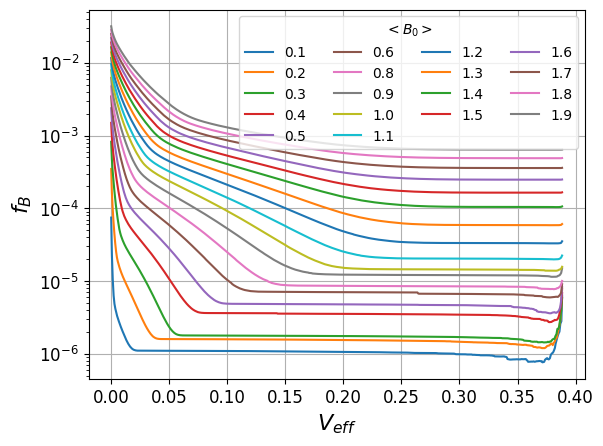

In [35]:
plt.figure()

for i in range(len(eff_vol_list)):
    plt.semilogy(eff_vol_list[i],MSE_list[i])
    
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.grid(True)
plt.xlabel(r'$V_{eff}$',fontsize=16)
plt.ylabel(r'$f_B$',fontsize=16, horizontalalignment='right')
plt.legend(round(B0,1),title=r"$<B_0>$",ncol=4)

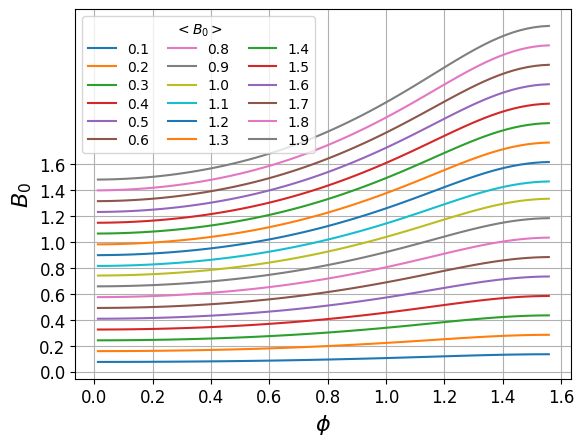

In [36]:
plt.figure()

for i in range(len(B0_list)):
    plt.plot(phi_list[i],B0_list[i])
    
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.grid(True)
plt.xlabel(r'$\phi$',fontsize=16)
plt.ylabel(r'$B_0$',fontsize=16)
plt.yticks(np.linspace(0,1.4,15))
plt.yticks(np.linspace(0,1.6,9))
plt.legend(round(B0,1),title=r"$<B_0>$",ncol=3,labelspacing=0.3,columnspacing=1.4)

Text(0, 0.5, 'Optimized $V_{eff}$')

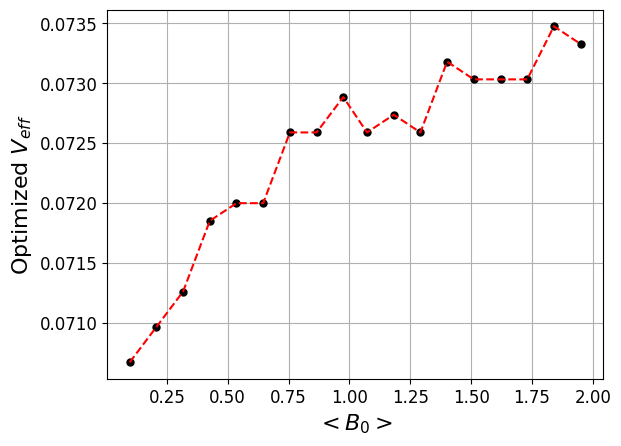

In [37]:
nfp=2
mu0 = 4 * np.pi * 1e-7
Bmax = 1.465
vol_eff_opt = []
for x in nmagnets_list:
    vol_eff_opt.append(x * mu0 * 2 * nfp / Bmax) 
np.savetxt("vol_eff_opt.txt",vol_eff_opt)
plt.figure()

plt.plot(B0,vol_eff_opt, "k.",markersize=10)
plt.plot(B0,vol_eff_opt, "r--")
    
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.grid(True)
plt.xlabel(r'$<B_0>$',fontsize=16)
plt.ylabel(r'Optimized $V_{eff}$',fontsize=16)


(-0.00025, 1e-05)

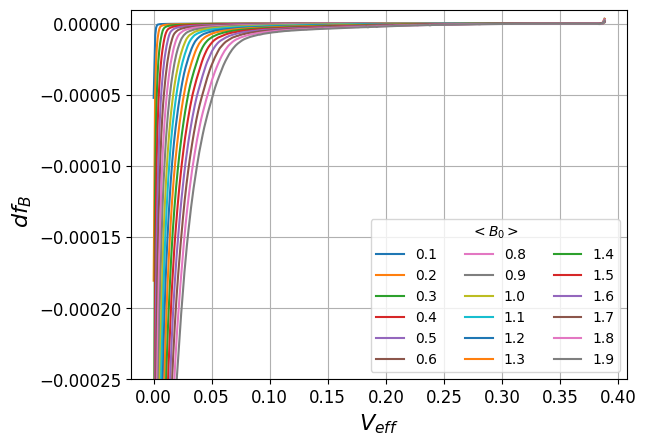

In [38]:
plt.figure()

for i in range(len(eff_vol_list)):
    plt.plot(eff_vol_list[i],np.gradient(MSE_list[i]))
    
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.grid(True)
plt.xlabel(r'$V_{eff}$',fontsize=16)
plt.ylabel(r'$df_B$',fontsize=16, horizontalalignment='right')
plt.legend(round(B0,1),title=r"$<B_0>$",ncol=3)
plt.ylim(-0.00025,0.00001)

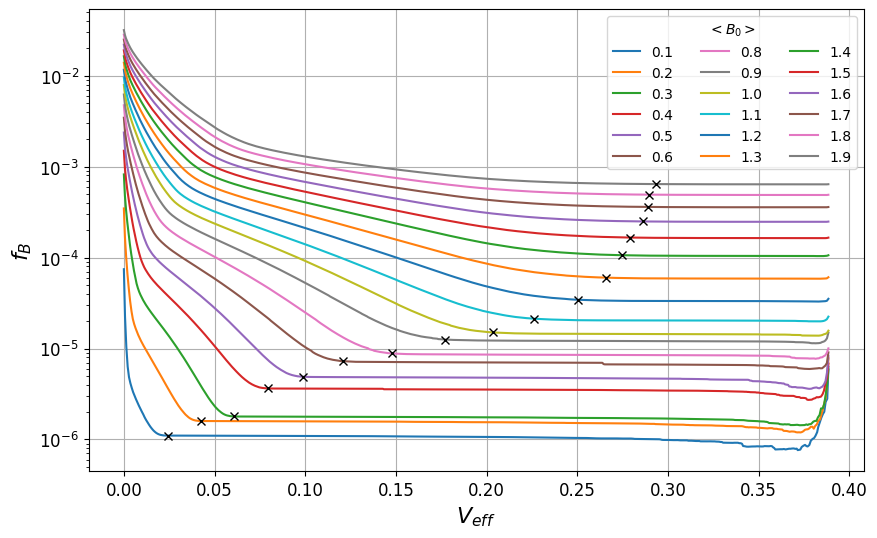

In [39]:
plateau_start_list=[]
plateau_start_MSE = []
plateau_start_V_eff  = []
dr = 0.02
R0 = 0.46
epselon = 10.8
R1=R0/epselon
nfp=2
dphi = 2*np.pi/(64*2*nfp)
dtheta = 2*np.pi/(64)

for i in range(len(eff_vol_list)):
    derivada = np.gradient(MSE_list[i],eff_vol_list[i])
    for j in range(len(MSE_list[i])):
        if(abs(derivada[j]) < 1e-6*B0[i]**2/(dr)):
            plateau_start_list.append(j)
            plateau_start_MSE.append(MSE_list[i][j])
            plateau_start_V_eff.append(eff_vol_list[i][j])
            break
        
#print(eff_vol_list[0])
#print(plateau_start_list)
plt.figure(figsize=(10,6))

for i in range(len(eff_vol_list)):
    plt.semilogy(eff_vol_list[i],MSE_list[i])
plt.semilogy(plateau_start_V_eff,plateau_start_MSE, "kx",label="")
    
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.grid(True)
plt.xlabel(r'$V_{eff}$',fontsize=16)
plt.ylabel(r'$f_B$',fontsize=16, horizontalalignment='right')
plt.legend(round(B0,1),title=r"$<B_0>$",ncol=3)
#np.savetxt("vol_eff_plateau.txt",plateau_start_V_eff)
#plt.savefig('ISTELL_V_eff_MSE.png')

Text(0, 0.5, '$V_{eff}$')

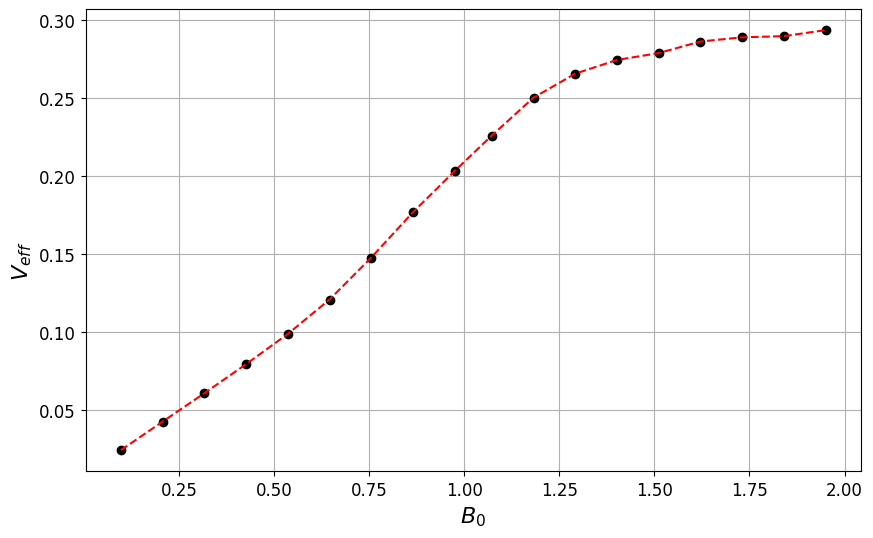

In [40]:
plt.figure(figsize=(10,6))

plt.plot(B0,plateau_start_V_eff, "ko")    
plt.plot(B0,plateau_start_V_eff, "r--") 
   
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.grid(True)
plt.xlabel(r'$B_0$',fontsize=16)
plt.ylabel(r'$V_{eff}$',fontsize=16, horizontalalignment='right')